## Random Forest Classifier Example

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Importing and Exploring the Data

In [2]:
df = pd.read_csv("D:\ProjectData\\rice_dataset.csv")

# display first few rows of data
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
df["Class"].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

### Data Preprocessing

In [4]:
df.drop(["id"],1, inplace = True)

In [5]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["Class"], 1)
y = df[["Class"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [6]:
X.shape, y.shape

((18185, 10), (18185, 1))

### Fitting a random forest classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, max_depth = 2, n_estimators = 100, criterion = "entropy")
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=0)

In [8]:
clf_0 = clf.estimators_[0]
clf_0

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto',
                       random_state=209652396)

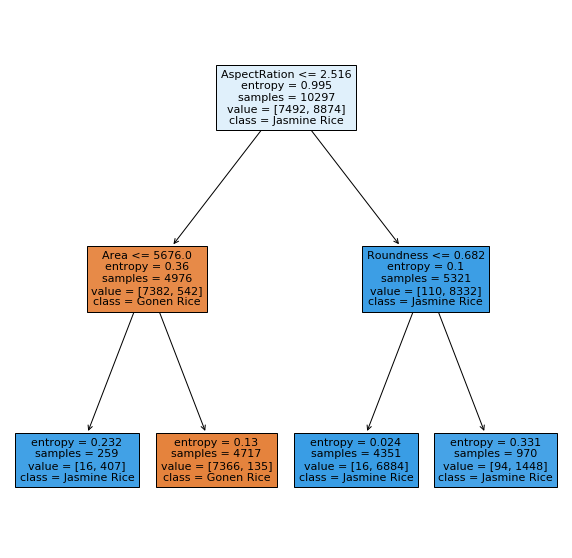

In [9]:
from sklearn import tree

class_names = ["Gonen Rice", "Jasmine Rice"]

plt.figure(figsize = (10, 10))
tree_plot_0 = tree.plot_tree(clf_0, 
                   feature_names=X.columns,  
                   class_names=class_names,
                   filled=True)

### Evaluating our Model

In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9986122352459338

In [11]:
# generating predictions
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9879054425508521

#### Feature Importance

In [13]:
df_feature_importance = pd.DataFrame(clf.feature_importances_, index = X.columns, columns = ["Feature Score"])

# sort values into descending order
df_feature_importance.sort_values(by = "Feature Score", ascending=False, inplace = True)

df_feature_importance

,Feature Score
MinorAxisLength,0.351299
AspectRation,0.200087
Eccentricity,0.162188
EquivDiameter,0.099341
Roundness,0.081845
ConvexArea,0.052707
Area,0.041755
Perimeter,0.008107
MajorAxisLength,0.002609
Extent,0.000062
